In [92]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import gurobi_logtools as glt

In [93]:
name = "Verification_16"
PATH = f".\Experiments\{name}\Logs"

In [94]:
result = glt.parse(PATH+"\*.log")
summary = result.summary()


In [95]:

nl = result.progress("nodelog")
print(nl[~nl['Incumbent'].isna()])
nl.head()

       CurrentNode  RemainingNodes       Obj  Depth  IntInf  Incumbent  \
61            1905          1257.0       NaN    NaN     NaN  16.244195   
62            1983          1294.0  15.69670  149.0  1274.0  16.244190   
63            3012          1485.0  16.01246  151.0  1306.0  16.244190   
64            4062          1504.0  15.93579  161.0  1301.0  16.244190   
65            5179          1493.0  15.92330  158.0  1268.0  16.244190   
...            ...             ...       ...    ...     ...        ...   
29591     72238857      22743547.0       NaN  168.0     NaN  12.310900   
29592     72247827      22745814.0  11.86422  165.0   507.0  12.310900   
29593     72255132      22747845.0  11.86021  164.0   513.0  12.310900   
29594     72264604      22750231.0  11.87864  195.0   467.0  12.310900   
29595     72273401             NaN       NaN    NaN     NaN  12.310900   

          BestBd       Gap  ItPerNode      Time NewSolution      Pruned  \
61     10.377930  0.361000      821.

c:\Users\sian_\OneDrive\Documents\Thesis\Transformer_Formulation\pyomo_env\lib\site-packages\gurobi_logtools\api.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  left=pd.concat(progress),


,CurrentNode,RemainingNodes,Obj,Depth,IntInf,Incumbent,BestBd,Gap,ItPerNode,Time,NewSolution,Pruned,LogFilePath,LogNumber,Seed,Version
0,0,0.0,-70.19216,0.0,1347.0,NaN,-70.19216,NaN,NaN,0.0,NaN,NaN,.\Experiments\Verification_16\Logs\vit_18_1_6_...,1,0,11.0.2
1,0,0.0,-70.19164,0.0,1366.0,NaN,-70.19164,NaN,NaN,1.0,NaN,NaN,.\Experiments\Verification_16\Logs\vit_18_1_6_...,1,0,11.0.2
2,0,0.0,-70.19164,0.0,1364.0,NaN,-70.19164,NaN,NaN,1.0,NaN,NaN,.\Experiments\Verification_16\Logs\vit_18_1_6_...,1,0,11.0.2
3,0,0.0,-70.17021,0.0,1362.0,NaN,-70.17021,NaN,NaN,2.0,NaN,NaN,.\Experiments\Verification_16\Logs\vit_18_1_6_...,1,0,11.0.2
4,0,0.0,-70.17020,0.0,1364.0,NaN,-70.17020,NaN,NaN,2.0,NaN,NaN,.\Experiments\Verification_16\Logs\vit_18_1_6_...,1,0,11.0.2


In [96]:
print(nl[~nl['NewSolution'].isna()]["NewSolution"])

61       H
192      H
194      H
200      H
241      H
        ..
23756    H
23787    H
23825    H
28500    H
29203    H
Name: NewSolution, Length: 100, dtype: object


In [97]:
regex_pattern = r'vit_(\d+)_(\d+)_(\d+)_(\d+)_i(\d+)_r(\d+)_c(\d+)\.log'
nl[['Embed_Dim', 'Enc_Layers', 'Heads', 'Mlp_Dim', 'I', 'Repetition', 'Config']] = nl['LogFilePath'].str.extract(regex_pattern)
nl.head()


,CurrentNode,RemainingNodes,Obj,Depth,IntInf,Incumbent,BestBd,Gap,ItPerNode,Time,...,LogNumber,Seed,Version,Embed_Dim,Enc_Layers,Heads,Mlp_Dim,I,Repetition,Config
0,0,0.0,-70.19216,0.0,1347.0,NaN,-70.19216,NaN,NaN,0.0,...,1,0,11.0.2,18,1,6,12,4,2,2
1,0,0.0,-70.19164,0.0,1366.0,NaN,-70.19164,NaN,NaN,1.0,...,1,0,11.0.2,18,1,6,12,4,2,2
2,0,0.0,-70.19164,0.0,1364.0,NaN,-70.19164,NaN,NaN,1.0,...,1,0,11.0.2,18,1,6,12,4,2,2
3,0,0.0,-70.17021,0.0,1362.0,NaN,-70.17021,NaN,NaN,2.0,...,1,0,11.0.2,18,1,6,12,4,2,2
4,0,0.0,-70.17020,0.0,1364.0,NaN,-70.17020,NaN,NaN,2.0,...,1,0,11.0.2,18,1,6,12,4,2,2


In [98]:
nl

,CurrentNode,RemainingNodes,Obj,Depth,IntInf,Incumbent,BestBd,Gap,ItPerNode,Time,...,LogNumber,Seed,Version,Embed_Dim,Enc_Layers,Heads,Mlp_Dim,I,Repetition,Config
0,0,0.0,-70.19216,0.0,1347.0,NaN,-70.192160,NaN,NaN,0.00,...,1,0,11.0.2,18,1,6,12,4,2,2
1,0,0.0,-70.19164,0.0,1366.0,NaN,-70.191640,NaN,NaN,1.00,...,1,0,11.0.2,18,1,6,12,4,2,2
2,0,0.0,-70.19164,0.0,1364.0,NaN,-70.191640,NaN,NaN,1.00,...,1,0,11.0.2,18,1,6,12,4,2,2
3,0,0.0,-70.17021,0.0,1362.0,NaN,-70.170210,NaN,NaN,2.00,...,1,0,11.0.2,18,1,6,12,4,2,2
4,0,0.0,-70.17020,0.0,1364.0,NaN,-70.170200,NaN,NaN,2.00,...,1,0,11.0.2,18,1,6,12,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31432,956773,579848.0,-41.00561,153.0,1037.0,NaN,-41.005620,NaN,1197.0,42844.00,...,1,0,11.0.2,6,2,6,12,4,3,3
31433,958854,581652.0,-41.00561,133.0,1017.0,NaN,-41.005620,NaN,1198.0,42982.00,...,1,0,11.0.2,6,2,6,12,4,3,3
31434,961182,583263.0,NaN,118.0,NaN,NaN,-41.005620,NaN,1199.0,43119.00,...,1,0,11.0.2,6,2,6,12,4,3,3
31435,963363,583944.0,-41.00561,73.0,1003.0,NaN,-41.005620,NaN,1200.0,43200.00,...,1,0,11.0.2,6,2,6,12,4,3,3


In [99]:
import pandas as pd
import numpy as np

nl2 = nl
# Ensure columns are numeric, converting non-numeric entries to NaN
for col in ['Time', 'CurrentNode', 'NewSolution', 'Gap', 'Incumbent']:
    nl2[col] = pd.to_numeric(nl[col], errors='coerce')

# Define helper functions for individual column aggregations
def time_to_first_feasible(series):
    feasible_times = series.dropna()
    return feasible_times.min() if not feasible_times.empty else np.nan

def count_feasible(series):
    feasible_times = series.dropna()
    return feasible_times.min() if not feasible_times.empty else np.nan

def final_value(series):
    valid_values = series.dropna()
    return valid_values.iloc[-1] if not valid_values.empty else np.nan

# Aggregate metrics per Embed_Dim, Enc_Layers, and Config
config_metrics = (
    nl2.groupby(['Embed_Dim', 'Enc_Layers', 'Config']).agg(
        Time_to_optimal=('Time', 'max'),
        Nodes_explored=('CurrentNode', 'max'),
        Solutions_found=('Incumbent', 'count'),
        Final_gap=('Gap', final_value),
        Objective_value=('Incumbent', final_value)
    )
    .reset_index()
)

# Average the metrics for each unique combination of Embed_Dim, Enc_Layers, and Config
average_metrics = config_metrics.groupby(['Embed_Dim', 'Enc_Layers', 'Config']).mean(numeric_only=True).reset_index()

# Display the resulting DataFrame
average_metrics.columns = [
    'Embed_Dim', 'Enc_Layers', 'Config', 'Avg_Time_to_optimal', 
    'Avg_Nodes_explored', 'Avg_Solutions_found', 'Avg_Final_gap', 'Avg_Objective_value'
]

average_metrics


,Embed_Dim,Enc_Layers,Config,Avg_Time_to_optimal,Avg_Nodes_explored,Avg_Solutions_found,Avg_Final_gap,Avg_Objective_value
0,18,1,2,43200.06,15548357.0,7881.0,0.016135,16.244193
1,18,1,3,43200.02,3812481.0,0.0,NaN,NaN
2,6,1,2,46722.49,67464864.0,8194.0,0.037587,12.310905
3,6,1,3,43200.08,72273401.0,8638.0,0.037955,12.310900
4,6,2,2,43200.13,1837189.0,0.0,NaN,NaN
5,6,2,3,43200.03,964735.0,0.0,NaN,NaN


In [100]:
# 1 rep --> nothing to avg over
group_metrics = (
    nl2.groupby(['Embed_Dim', 'Enc_Layers', 'Config', 'Time']).agg(
        Incumbent_mean=('Incumbent', 'mean'),
        Incumbent_std=('Incumbent', 'std'),
        BestBd_mean=('BestBd', 'mean'),
        BestBd_std=('BestBd', 'std')
    )
    .reset_index()
)

# Average the metrics for each unique combination of Embed_Dim, Enc_Layers, and Config
#grouped_nl = group_metrics.groupby(['Embed_Dim', 'Enc_Layers', 'Config']) #.mean(numeric_only=True).reset_index()

# # Display the resulting DataFrame
# grouped_nl.columns = ['Embed_Dim', 'Enc_Layers', 'Config', 'Time', 'Incumbent_mean', 'Incumbent_std', 'BestBd_mean', 'BestBd_std']

grouped_nl = nl # 1 rep
grouped_nl['Incumbent_mean'] = grouped_nl['Incumbent']
grouped_nl['BestBd_mean'] = grouped_nl['BestBd']
configs = grouped_nl[['Embed_Dim', 'Enc_Layers', 'Config']].drop_duplicates().values
average_metrics

,Embed_Dim,Enc_Layers,Config,Avg_Time_to_optimal,Avg_Nodes_explored,Avg_Solutions_found,Avg_Final_gap,Avg_Objective_value
0,18,1,2,43200.06,15548357.0,7881.0,0.016135,16.244193
1,18,1,3,43200.02,3812481.0,0.0,NaN,NaN
2,6,1,2,46722.49,67464864.0,8194.0,0.037587,12.310905
3,6,1,3,43200.08,72273401.0,8638.0,0.037955,12.310900
4,6,2,2,43200.13,1837189.0,0.0,NaN,NaN
5,6,2,3,43200.03,964735.0,0.0,NaN,NaN


In [101]:
configs

array([['18', '1', '2'],
       ['18', '1', '3'],
       ['6', '1', '2'],
       ['6', '1', '3'],
       ['6', '2', '2'],
       ['6', '2', '3']], dtype=object)

In [102]:
# combinations = {
#     #'All': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 1, 'MHA_MC': 1},
#     #'No_MC': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 1, 'MHA_MC': 0},
#     # 'I_only': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 0, 'MHA_MC': 0},
#     # # 'LN_only': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 0, 'MHA_MC': 0},
#     # # 'Prop_MC': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 1, 'MHA_MC': 1},
#     # 'LN_prop': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 1, 'MHA_MC': 0},
#     # 'None': {'LN_I': 0, 'MHA_I': 0, 'MHA_D': 0, 'MHA_MC': 0},
# }
conf = ['No_MC','I_only', 'LN_prop']
combinations = {}
for i in configs:
        combinations[f'E{i[0]}_D{i[1]}_{conf[int(i[-1])-1]}'] = i[0]+i[-1]
    
print(combinations)

{'E18_D1_I_only': '182', 'E18_D1_LN_prop': '183', 'E6_D1_I_only': '62', 'E6_D1_LN_prop': '63', 'E6_D2_I_only': '62', 'E6_D2_LN_prop': '63'}


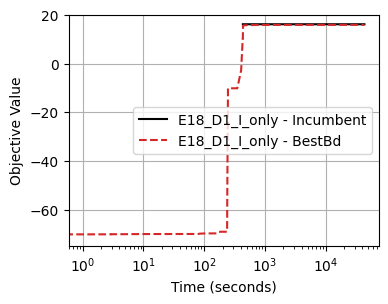

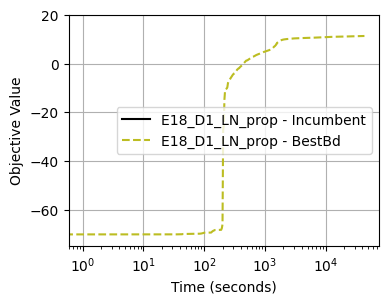

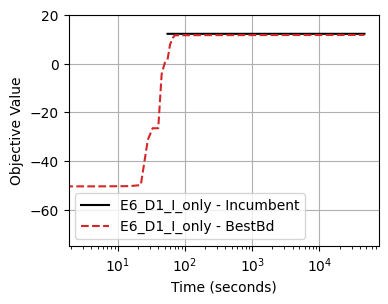

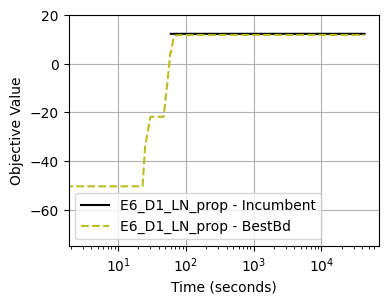

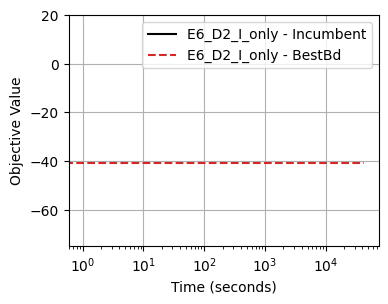

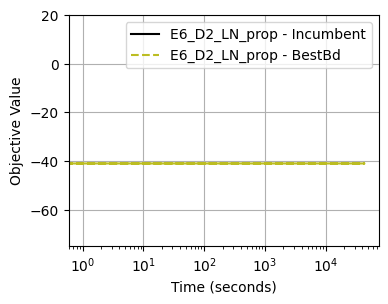

In [103]:
import matplotlib.pyplot as plt

# Initialize the figure size
colors = plt.get_cmap('tab10', len(grouped_nl['Config'].unique()))
config_names = list(combinations.keys())
colours = ['tab:orange', 'tab:red', 'tab:olive']
# Find the global min and max values for both the x and y axes across all configurations
# x_min = 0#grouped_nl['Time'].min() #10#
# x_max = 20#grouped_nl['Time'].max()

# y_min = min(grouped_nl['Incumbent_mean'].min(), grouped_nl['BestBd_mean'].min()) #1e-4 #
# y_max = max(grouped_nl['Incumbent_mean'].max(), grouped_nl['BestBd_mean'].max())

# Plot each configuration using the same x and y axis limits
for i, config in enumerate(configs):
    plt.figure(i, figsize=(4, 3))
    config_data = grouped_nl[(grouped_nl['Embed_Dim'] == config[0]) & (grouped_nl['Enc_Layers'] == config[1]) & (grouped_nl['Config'] == config[-1])]
    color = colours[int(config[-1])-1]

    # Plot Incumbent mean
    plt.plot(config_data['Time'], config_data['Incumbent_mean'],linestyle='-', label=f'{config_names[i]} - Incumbent', color='k')
    #Add shaded area for Incumbent std
    # plt.fill_between(config_data['Time'], 
    #                  config_data['Incumbent_mean'] - config_data['Incumbent_std'], 
    #                  config_data['Incumbent_mean'] + config_data['Incumbent_std'], 
    #                  color="black", alpha=0.5)

    # Plot BestBd mean
    plt.plot(config_data['Time'], config_data['BestBd_mean'], linestyle='--', label=f'{config_names[i]} - BestBd', color=color)
    # Add shaded area for BestBd std
    # plt.fill_between(config_data['Time'], 
    #                  config_data['BestBd_mean'] - config_data['BestBd_std'], 
    #                  config_data['BestBd_mean'] + config_data['BestBd_std'], 
    #                  color="black", alpha=0.5)
    # # Set to log scale
    # plt.yscale('log')
    plt.xscale('log')

    # # Set the same x and y limits for all plots
    #plt.xlim(x_min, x_max)
    plt.ylim(-75, 20)

    # Add labels
    plt.grid(True)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Objective Value')
    plt.legend()
    

    # PATH = r"C:\Users\sian_\OneDrive\Documents\Thesis"
    # plt.savefig(PATH+f'\images\{config_names[i]}_time_conv.png')  
    # #plt.show()
     


In [104]:
grouped_nl2 = nl.groupby(['Config', 'CurrentNode']).agg({
    'Incumbent': ['mean', 'std'],
    'BestBd': ['mean', 'std']
}).reset_index()

configs = grouped_nl2['Config'].unique()
grouped_nl2.columns = ['Config', 'Node', 'Incumbent_mean', 'Incumbent_std', 'BestBd_mean', 'BestBd_std']
grouped_nl2.head()

,Config,Node,Incumbent_mean,Incumbent_std,BestBd_mean,BestBd_std
0,2,0,NaN,NaN,-59.71784,12.399368
1,2,1,NaN,NaN,-55.52140,20.528427
2,2,3,NaN,NaN,-41.00561,NaN
3,2,13,NaN,NaN,-50.42426,NaN
4,2,35,NaN,NaN,-70.01237,NaN


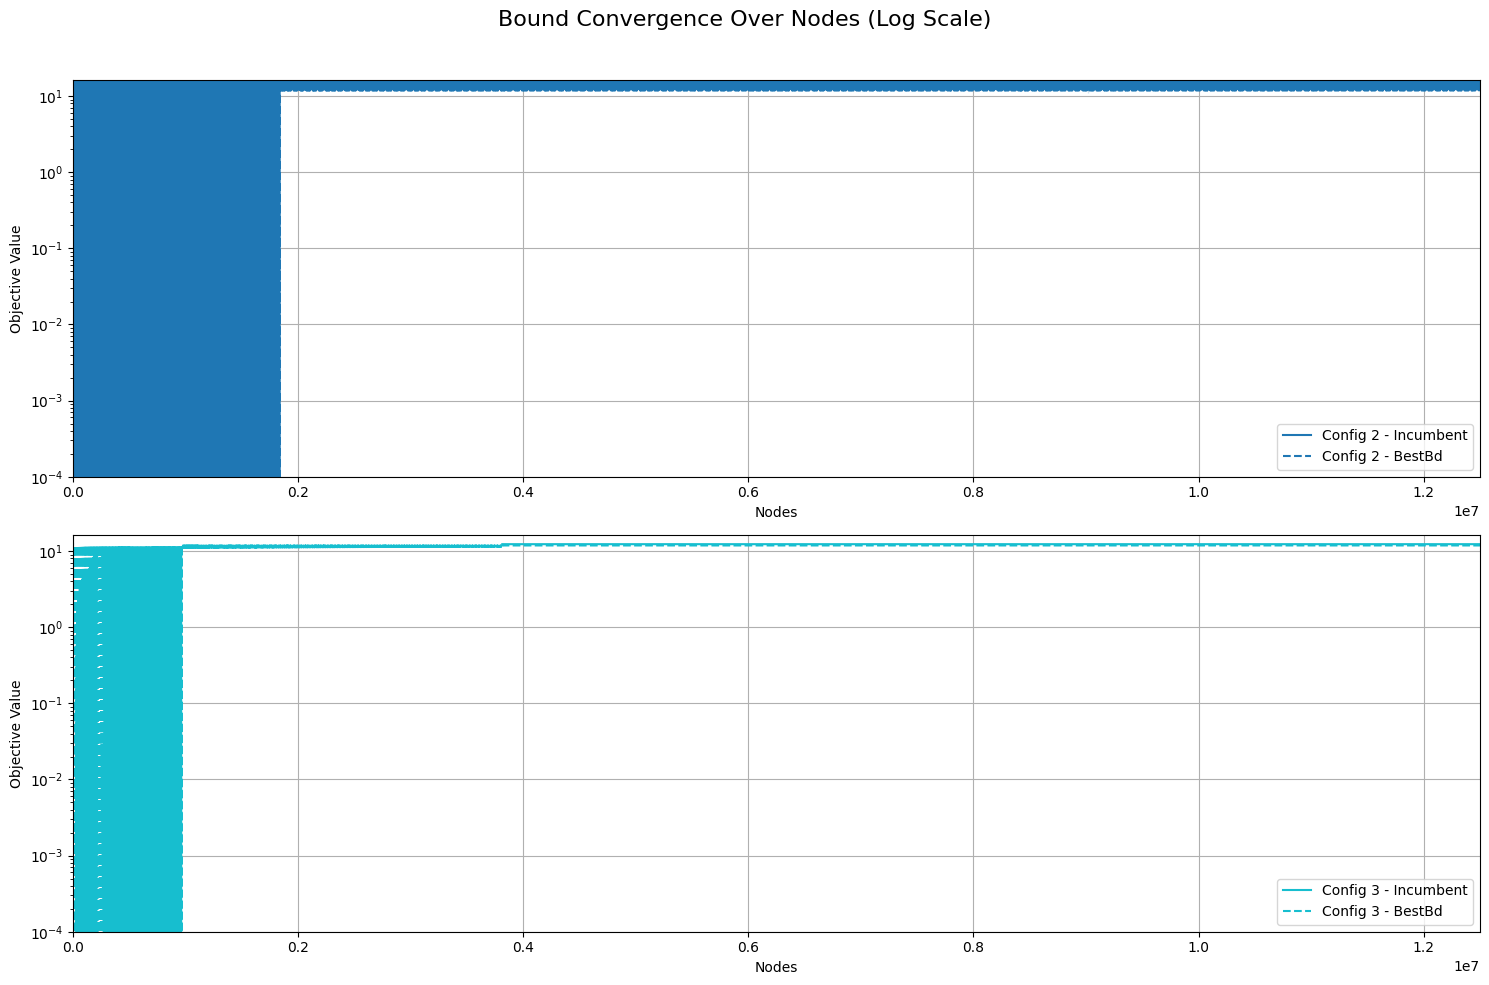

<Figure size 640x480 with 0 Axes>

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the number of subplots based on the number of configurations
num_configs = len(configs)
fig, axes = plt.subplots(nrows=2, ncols=(num_configs + 1) // 2, figsize=(15, 10))  # Adjust subplot grid

# Set the color map for the plots
colors = plt.get_cmap('tab10', num_configs)

# Find the global min and max values for the x and y axes across all configurations
x_min = grouped_nl2['Node'].min()
x_max = 1.25e7
y_min = 1e-4
y_max = max(grouped_nl2['Incumbent_mean'].max(), grouped_nl2['BestBd_mean'].max())

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each configuration in a separate subplot
for i, config in enumerate(configs):
    ax = axes[i]
    config_data = grouped_nl2[grouped_nl2['Config'] == config]
    color = colors(i)

    # Plot Incumbent mean
    ax.plot(config_data['Node'], config_data['Incumbent_mean'], label=f'Config {config} - Incumbent', color=color)
    # Add shaded area for Incumbent std
    ax.fill_between(config_data['Node'], 
                    config_data['Incumbent_mean'] - config_data['Incumbent_std'], 
                    config_data['Incumbent_mean'] + config_data['Incumbent_std'], 
                    color=color, alpha=0.2)

    # Plot BestBd mean
    ax.plot(config_data['Node'], config_data['BestBd_mean'], linestyle='--', label=f'Config {config} - BestBd', color=color)
    # Add shaded area for BestBd std
    ax.fill_between(config_data['Node'], 
                    config_data['BestBd_mean'] - config_data['BestBd_std'], 
                    config_data['BestBd_mean'] + config_data['BestBd_std'], 
                    color=color, alpha=0.2)

    # Set log scale and axis limits
    ax.set_yscale('log')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Add labels and grid
    ax.set_xlabel('Nodes')
    ax.set_ylabel('Objective Value')
    ax.grid(True)
    ax.legend()

# Set the title for the entire figure
fig.suptitle('Bound Convergence Over Nodes (Log Scale)', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# Optionally, save the figure
PATH = r"C:\Users\sian_\OneDrive\Documents\Thesis"
plt.savefig(PATH + r'\images\bound_convergence_nodes_subplots.png')
